In [11]:
data("case0402", package = "Sleuth2")

# Nastavení seed pro opakovatelnost.
set.seed(123)

In [12]:
# Načtení knihovny
library(knitr)
library(crayon)
library(ggplot2)

cat("\n")
cat(bold("Výpis prvních několika řádků dat:"))
kable(head(case0402), format = "simple")
cat("\n")


Výpis prvních několika řádků dat:



 Time  Treatmt     Censor
-----  ---------  -------
   68  Modified         0
   70  Modified         0
   73  Modified         0
   75  Modified         0
   77  Modified         0
   80  Modified         0


Struktura dat:
'data.frame':	28 obs. of  3 variables:
 $ Time   : num  68 70 73 75 77 80 80 132 148 155 ...
 $ Treatmt: Factor w/ 2 levels "Modified","Conventional": 1 1 1 1 1 1 1 1 1 1 ...
 $ Censor : num  0 0 0 0 0 0 0 0 0 0 ...

Ukázka dat:




| Time | Treatmt  | Censor |
|:----:|:--------:|:------:|
|  68  | Modified |   0    |
|  70  | Modified |   0    |
|  73  | Modified |   0    |
|  75  | Modified |   0    |
|  77  | Modified |   0    |
|  80  | Modified |   0    |


Souhrnný přehled dat:




|Var1 |Var2    |Freq            |
|:----|:-------|:---------------|
|     |Time    |Min.   : 68.0   |
|     |Time    |1st Qu.:117.5   |
|     |Time    |Median :158.0   |
|     |Time    |Mean   :174.7   |
|     |Time    |3rd Qu.:231.5   |
|     |Time    |Max.   :300.0   |
|     |Treatmt |Modified    :14 |
|     |Treatmt |Conventional:14 |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Treatmt |NA              |
|     |Censor  |Min.   :0.0000  |
|     |Censor  |1st Qu.:0.0000  |
|     |Censor  |Median :0.0000  |
|     |Censor  |Mean   :0.1786  |
|     |Censor  |3rd Qu.:0.0000  |
|     |Censor  |Max.   :1.0000  |


Vizualizace grafů:


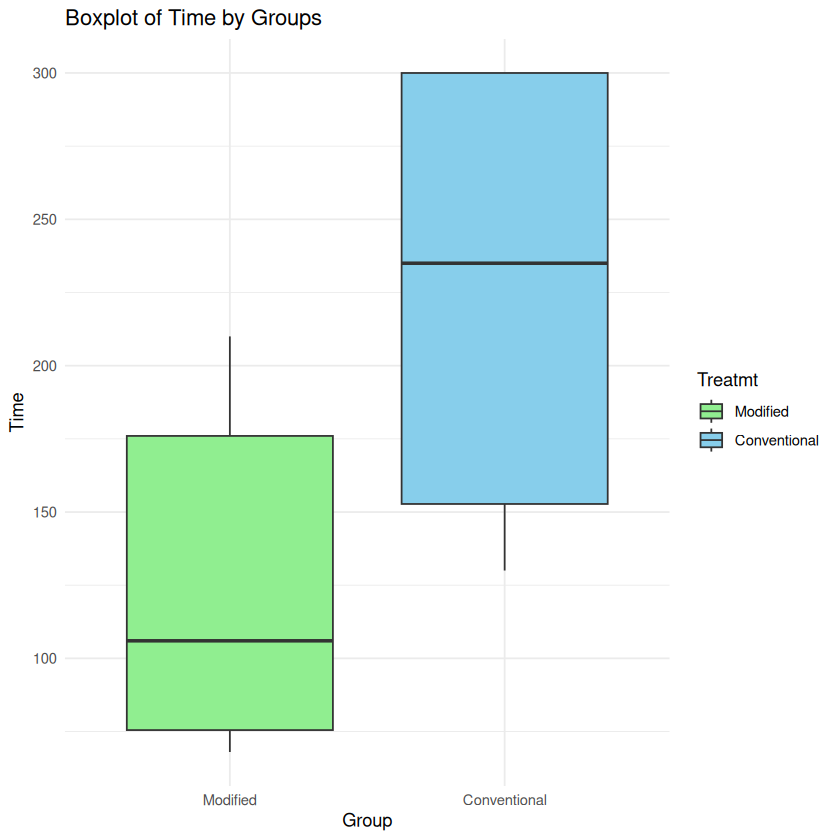

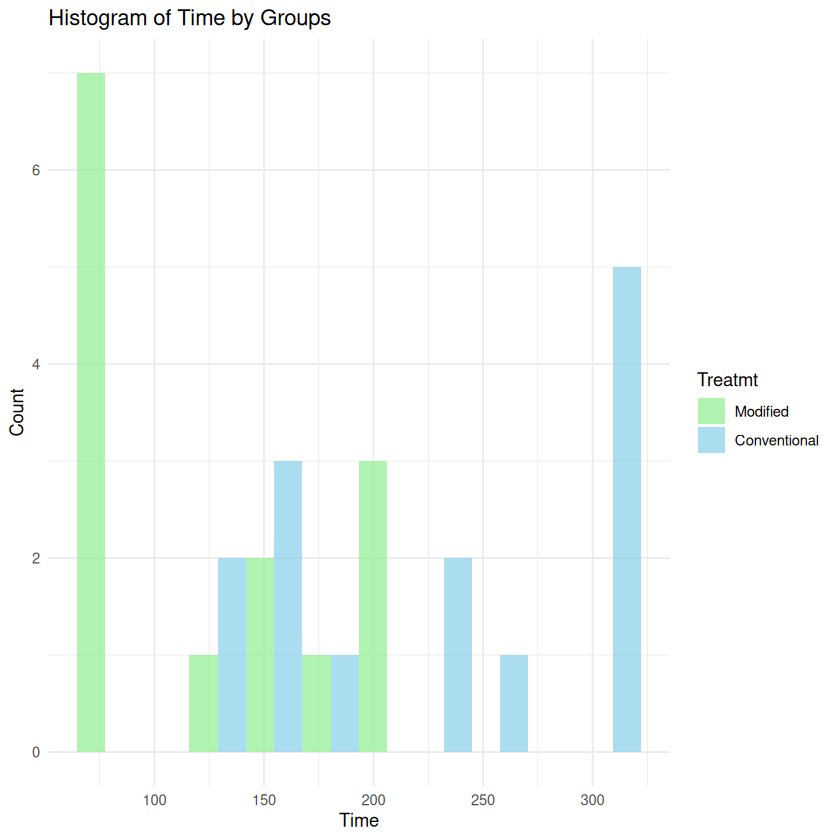

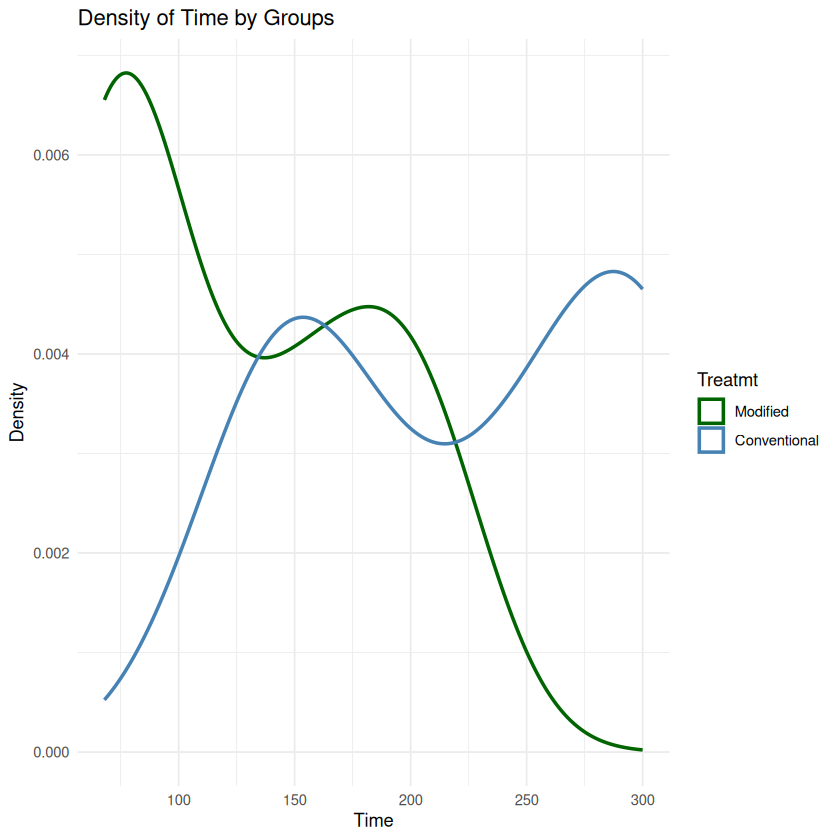

In [13]:
# Zobrazení struktury dat
cat("\n")
cat(bold("Struktura dat:\n"))
str(case0402)

# Tabulka prvních řádků dat v hezčím formátu
cat(bold("\nUkázka dat:\n"))
kable(head(case0402), format = "pipe", align = "c")  # Formát 'pipe' zlepší čitelnost

# Souhrnný přehled dat
cat(bold("\nSouhrnný přehled dat:\n"))
summary_table <- as.data.frame(summary(case0402))  # Převod na tabulku
kable(summary_table, format = "pipe", align = "l")  # Formátování tabulky

cat(bold("\nVizualizace grafů:\n"))

# Boxplot podle skupin
ggplot(case0402, aes(x = Treatmt, y = Time, fill = Treatmt)) +
  geom_boxplot() +
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) +
  labs(title = "Boxplot of Time by Groups",
       x = "Group",
       y = "Time") +
  theme_minimal()

# Histogramy pro jednotlivé skupiny
ggplot(case0402, aes(x = Time, fill = Treatmt)) +
  geom_histogram(position = "dodge", bins = 10, alpha = 0.7) +
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) +
  labs(title = "Histogram of Time by Groups",
       x = "Time",
       y = "Count") +
  theme_minimal()

# Hustotní graf (Density plot) podle skupin
ggplot(case0402, aes(x = Time, color = Treatmt)) +
  geom_density(linewidth = 1) +  # Použití linewidth místo size
  scale_color_manual(values = c("Modified" = "darkgreen", "Conventional" = "steelblue")) +
  labs(title = "Density of Time by Groups",
       x = "Time",
       y = "Density") +
  theme_minimal()


In [14]:
library(ggplot2)

# Rozdělení na dvě skupiny podle sloupce 'Treatmt'
group1 <- subset(case0402, Treatmt == "Modified")  # První skupina
group2 <- subset(case0402, Treatmt == "Conventional")  # Druhá skupina

# Výpočty pro skupinu 1
mean1 <- mean(group1$Time)  # Střední hodnota
var1 <- var(group1$Time)    # Rozptyl
median1 <- median(group1$Time)  # Medián

# Výpočty pro skupinu 2
mean2 <- mean(group2$Time)
var2 <- var(group2$Time)
median2 <- median(group2$Time)

# Dynamický výstup s popisem pro skupinu 1
cat(bold("\nVýsledky pro první skupinu (Modified):"))
cat("\n- Střední hodnota (mean):", mean1, "\n")
cat("- Rozptyl (variance):", var1, "\n")
cat("- Medián (median):", median1, "\n\n")

# Dynamický výstup s popisem pro skupinu 2
cat(bold("Výsledky pro druhou skupinu (Conventional):"))
cat("\n- Střední hodnota (mean):", mean2, "\n")
cat("- Rozptyl (variance):", var2, "\n")
cat("- Medián (median):", median2, "\n\n")



Výsledky pro první skupinu (Modified):
- Střední hodnota (mean): 125.2857 
- Rozptyl (variance): 3203.297 
- Medián (median): 106 

Výsledky pro druhou skupinu (Conventional):
- Střední hodnota (mean): 224.1429 
- Rozptyl (variance): 4976.901 
- Medián (median): 235 



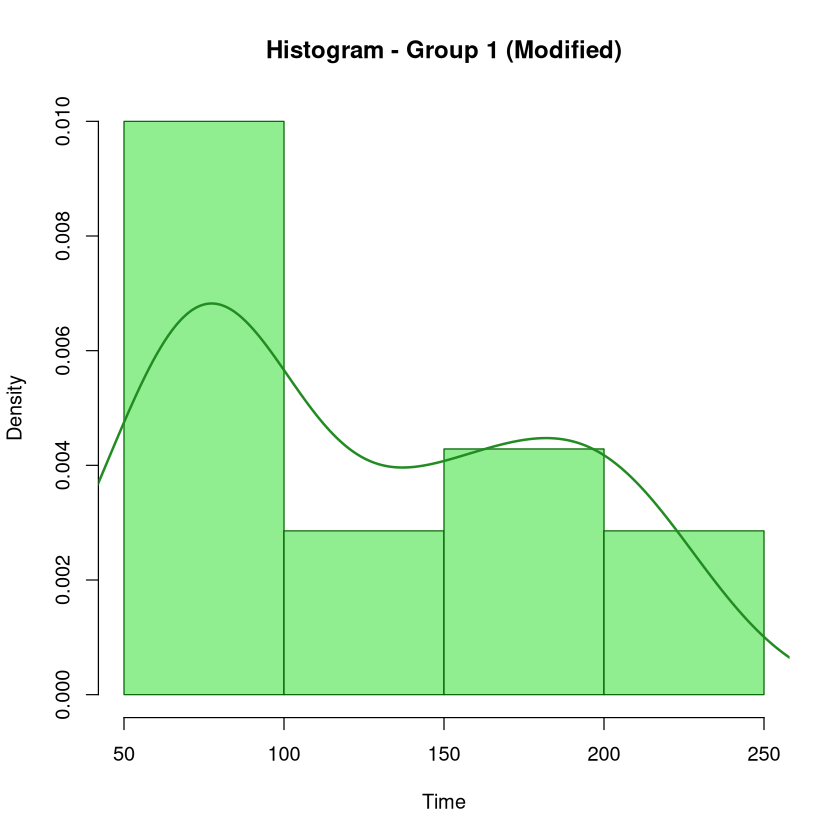

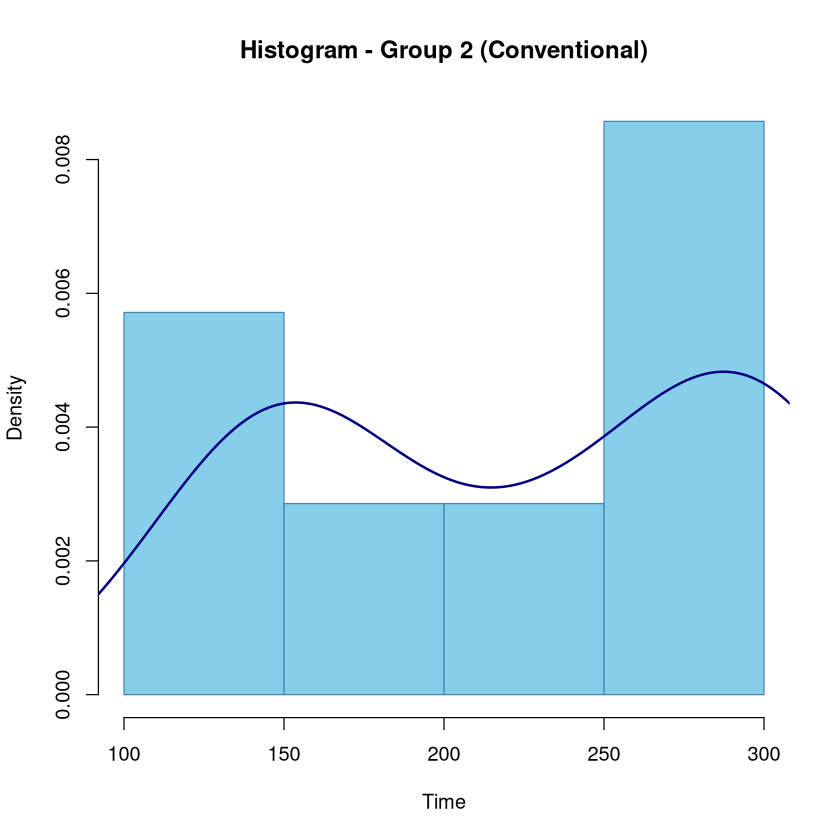

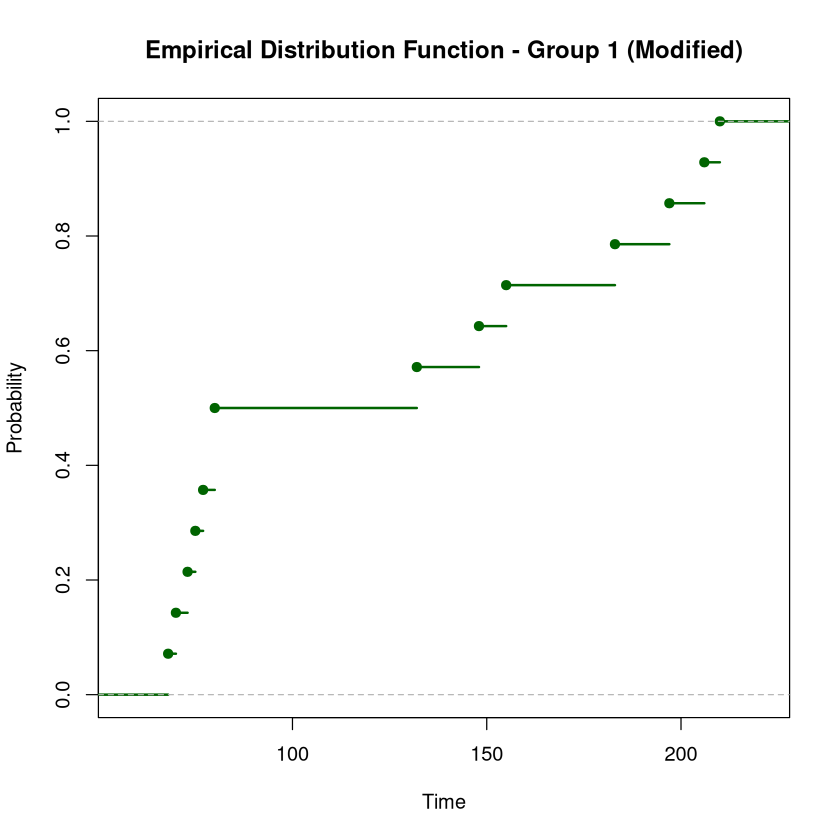

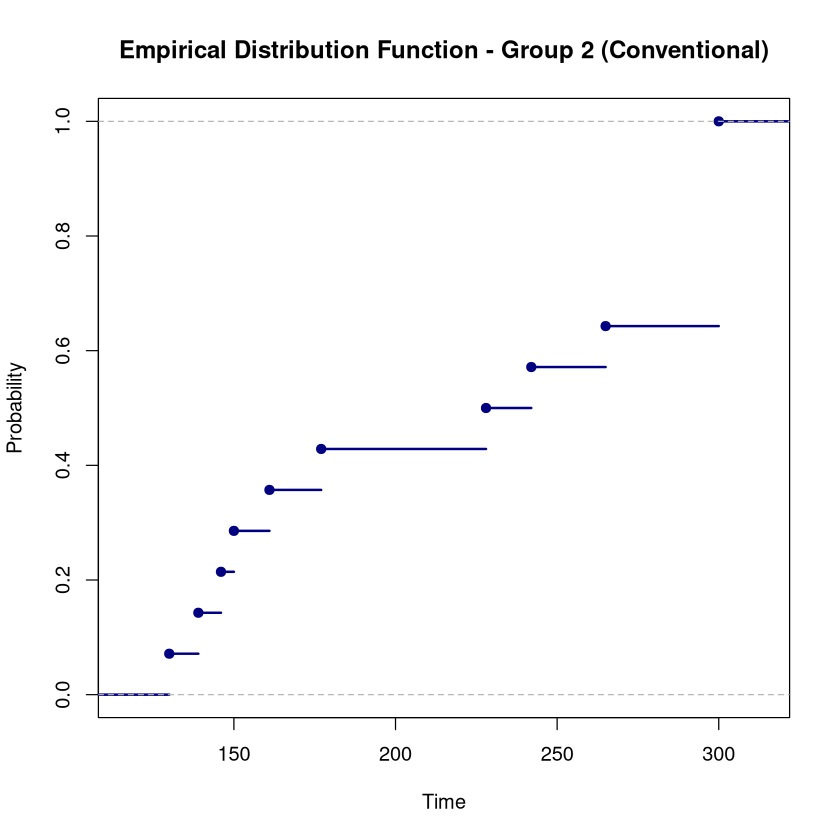

In [15]:
# Načtení datového souboru
data("case0402", package = "Sleuth2")

# Rozdělení na dvě skupiny podle sloupce 'Treatmt'
group1 <- subset(case0402, Treatmt == "Modified")  # Skupina 1
group2 <- subset(case0402, Treatmt == "Conventional")  # Skupina 2

# Vykreslení histogramu pro skupinu 1
hist(
  group1$Time,
  main = "Histogram - Group 1 (Modified)",
  xlab = "Time",
  ylab = "Density", 
  col = "lightgreen",  # Barva výplně
  border = "darkgreen",  # Barva okrajů
  freq = FALSE # Nastavení pro hustotu místo frekvence
)
lines(density(group1$Time), col = "forestgreen", lwd = 2) # Hustotní křivka

# Vykreslení histogramu pro skupinu 2
hist(
  group2$Time,
  main = "Histogram - Group 2 (Conventional)",
  xlab = "Time",
  ylab = "Density", 
  col = "skyblue",  # Barva výplně
  border = "steelblue",  # Barva okrajů
  freq = FALSE
)
lines(density(group2$Time), col = "navy", lwd = 2) # Hustotní křivka

# Empirická distribuční funkce pro skupinu 1
plot(
  ecdf(group1$Time),
  main = "Empirical Distribution Function - Group 1 (Modified)",
  xlab = "Time",
  ylab = "Probability",
  col = "darkgreen",  
  lwd = 2
)

# Empirická distribuční funkce pro skupinu 2
plot(
  ecdf(group2$Time),
  main = "Empirical Distribution Function - Group 2 (Conventional)",
  xlab = "Time",
  ylab = "Probability",
  col = "navy", 
  lwd = 2
)



Vysvětlení odhadu parametrů pro Group 1 (Modified): 
- Normální rozdělení: Průměr (aritmetický průměr) a směrodatná odchylka vypočtené přímo z dat.
- Exponenciální rozdělení: Lambda (intenzita) je odhadnuta jako 1/průměr.
- Rovnoměrné rozdělení: Min a Max jsou odhadnuty jako nejmenší a největší hodnota dat.

Vysvětlení odhadu parametrů pro Group 1 (Modified): 
- Normální: průměr = 125.29 
- Směrodatná odchylka = 56.6 
- Exponenciální: lambda = 0.01 
- Rovnoměrné: min = 68 , max = 210 

Diskuze a zamyšlení pro Group 1 (Modified):
Po analýze grafu je zřejmé, že data Group 1 (Modified) lépe odpovídají exponenciálnímu rozdělení. Tvar histogramu a exponenciální hustota ukazují na asymetrické rozdělení s větším počtem nižších hodnot času.



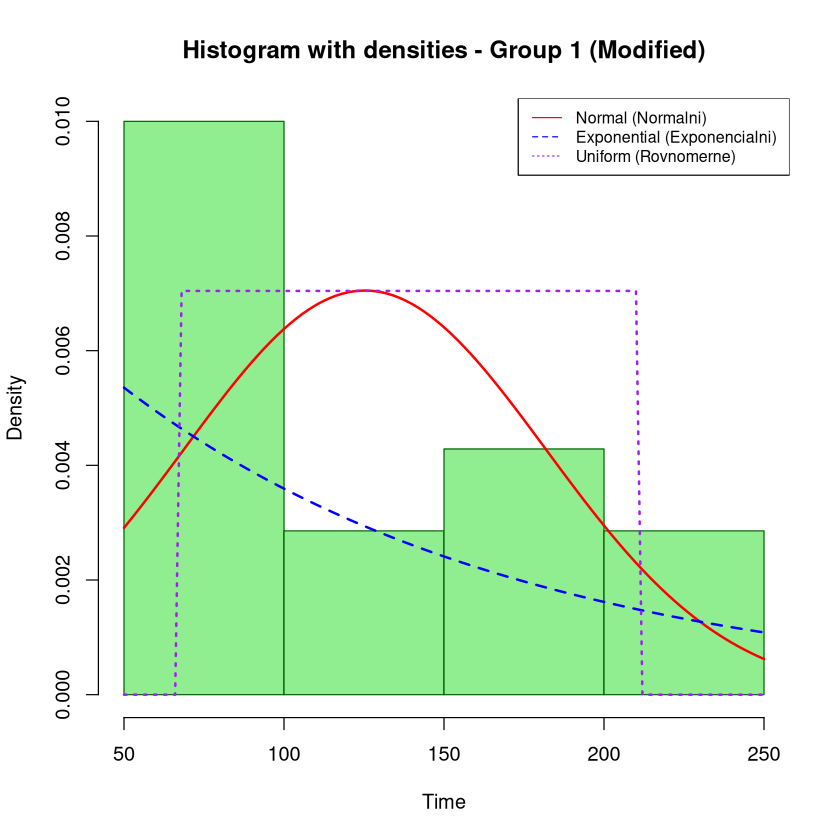


Vysvětlení odhadu parametrů pro Group 2 (Conventional): 
- Normální rozdělení: Průměr (aritmetický průměr) a směrodatná odchylka vypočtené přímo z dat.
- Exponenciální rozdělení: Lambda (intenzita) je odhadnuta jako 1/průměr.
- Rovnoměrné rozdělení: Min a Max jsou odhadnuty jako nejmenší a největší hodnota dat.

Vysvětlení odhadu parametrů pro Group 2 (Conventional): 
- Normální: průměr = 224.14 
- Směrodatná odchylka = 70.55 
- Exponenciální: lambda = 0 
- Rovnoměrné: min = 130 , max = 300 

Diskuze a zamyšlení:
Group 2 (Conventional):
Po analýze grafu je zřejmé, že data Group 2 (Conventional) nevykazují jednoznačné odpovídající rozdělení. I když normální rozdělení (červená čára) přibližně odpovídá tvaru histogramu, rozdíly v okrajích dat naznačují odchylky od teoretického normálního rozložení.

Exponenciální rozdělení (modrá čára) ani rovnoměrné rozdělení (fialová čára) se však histogramu nepřibližují dostatečně. Nejlepší aproximací se tedy jeví normální rozdělení, ačkoliv s jistými

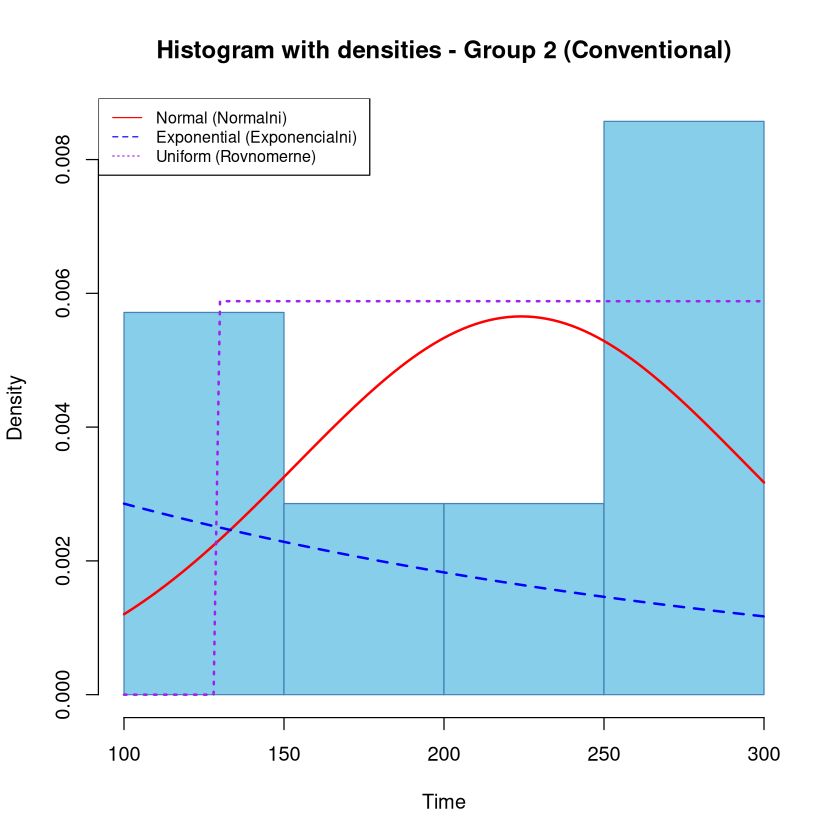

In [16]:
# Funkce pro vykreslení hustoty s histogramem
plot_densities <- function(data, group) {
  # Histogram
  hist(
    data,
    freq = FALSE,
    main = paste("Histogram with densities -", group),
    xlab = "Time",
    ylab = "Density",
    col = if (group == "Group 1 (Modified)") "lightgreen" else "skyblue",
    border = if (group == "Group 1 (Modified)") "darkgreen" else "steelblue"
  )
  
  # Odhad parametrů
  mean_val <- mean(data)  # Průměr - odhadnut jako aritmetický průměr dat
  sd_val <- sd(data)      # Směrodatná odchylka - vypočtena z dat pomocí standardní funkce sd()
  lambda_val <- 1 / mean_val  # Exponenciální parametr - odhadnut jako 1/průměr
  min_val <- min(data)    # Minimum pro rovnoměrné rozdělení - získáno jako minimum z dat
  max_val <- max(data)    # Maximum pro rovnoměrné rozdělení - získáno jako maximum z dat
  
  # Vysvětlení odhadu
  cat(bold(paste0("\nVysvětlení odhadu parametrů pro ", group,":")), "\n")
  cat("- Normální rozdělení: Průměr (aritmetický průměr) a směrodatná odchylka vypočtené přímo z dat.\n")
  cat("- Exponenciální rozdělení: Lambda (intenzita) je odhadnuta jako 1/průměr.\n")
  cat("- Rovnoměrné rozdělení: Min a Max jsou odhadnuty jako nejmenší a největší hodnota dat.\n\n")
  
  # Normální hustota
  curve(dnorm(x, mean = mean_val, sd = sd_val),
        col = "red", lwd = 2, add = TRUE, lty = 1)
  
  # Exponenciální hustota
  curve(dexp(x, rate = lambda_val),
        col = "blue", lwd = 2, add = TRUE, lty = 2)
  
  # Rovnoměrná hustota
  curve(dunif(x, min = min_val, max = max_val),
        col = "purple", lwd = 2, add = TRUE, lty = 3)
  
  # Legenda
  legend_position <- if (group == "Group 1 (Modified)") "topright" else "topleft"
  legend(legend_position, legend = c("Normal (Normalni)", "Exponential (Exponencialni)", "Uniform (Rovnomerne)"),
         col = c("red", "blue", "purple"), lty = 1:3, cex = 0.8)

  # Výpis parametrů
  cat(bold(paste0("Vysvětlení odhadu parametrů pro ", group, ":")), "\n")
  cat("- Normální: průměr =", round(mean_val, 2), "\n")
  cat("- Směrodatná odchylka =", round(sd_val, 2), "\n")
  cat("- Exponenciální: lambda =", round(lambda_val, 2), "\n")
  cat("- Rovnoměrné: min =", round(min_val, 2), ", max =", round(max_val, 2), "\n\n")
  
  # Diskuze pro jednotlivé skupiny
  if (group == "Group 1 (Modified)") {
    cat(bold("Diskuze a zamyšlení pro Group 1 (Modified):"))
    cat("\nPo analýze grafu je zřejmé, že data Group 1 (Modified) lépe odpovídají exponenciálnímu rozdělení. Tvar histogramu a exponenciální hustota ukazují na asymetrické rozdělení s větším počtem nižších hodnot času.\n\n")
  } else if (group == "Group 2 (Conventional)") {
    cat(bold("Diskuze a zamyšlení:"))
    cat("\nGroup 2 (Conventional):\n")
    cat("Po analýze grafu je zřejmé, že data Group 2 (Conventional) nevykazují jednoznačné odpovídající rozdělení. I když normální rozdělení (červená čára) přibližně odpovídá tvaru histogramu, rozdíly v okrajích dat naznačují odchylky od teoretického normálního rozložení.\n")
    cat("\n")
    cat("Exponenciální rozdělení (modrá čára) ani rovnoměrné rozdělení (fialová čára) se však histogramu nepřibližují dostatečně. Nejlepší aproximací se tedy jeví normální rozdělení, ačkoliv s jistými výhradami. Tato skupina dat pravděpodobně vyžaduje detailnější analýzu nebo testy pro přesnější identifikaci správného modelu rozdělení.\n\n")
  }
}

# Vykreslení pro skupinu 1
plot_densities(group1$Time, "Group 1 (Modified)")

# Vykreslení pro skupinu 2
plot_densities(group2$Time, "Group 2 (Conventional)")



Číselné shrnutí pro Group 1 (Modified): 

Původní data:
- Minimum: 68 
- První kvartil: 75.5 
- Medián: 106 
- Průměr: 125.29 
- Třetí kvartil: 176 
- Maximum: 210 
- Směrodatná odchylka: 56.6 

Simulovaná data:
- Minimum: 0.58 
- První kvartil: 39.35 
- Medián: 106.21 
- Průměr: 131.01 
- Třetí kvartil: 184.02 
- Maximum: 903.44 
- Směrodatná odchylka: 130.12 



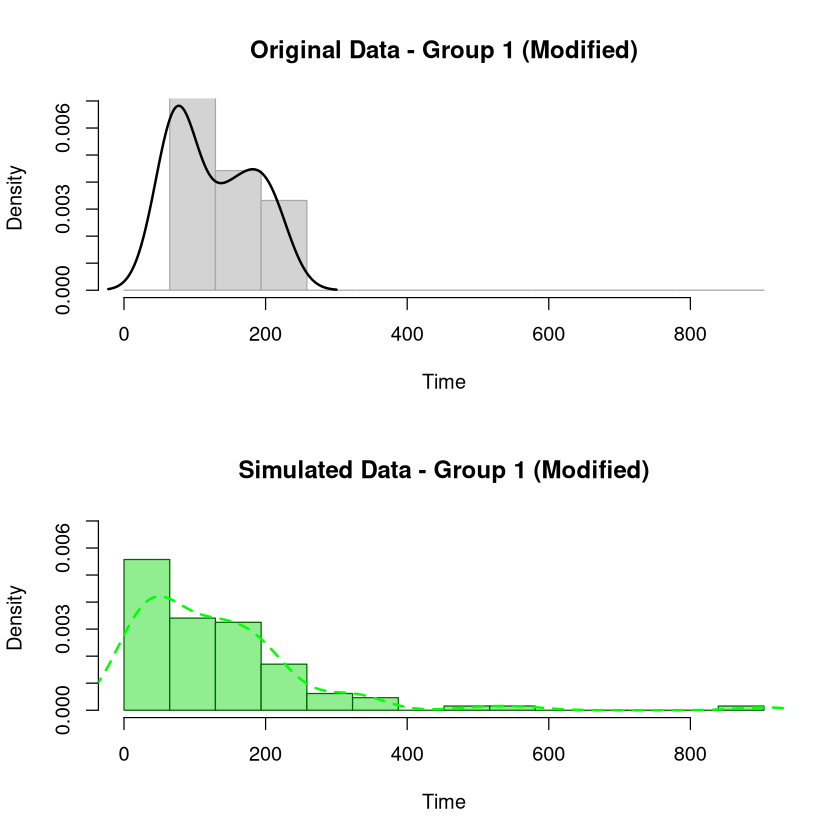


Číselné shrnutí pro Group 2 (Conventional): 

Původní data:
- Minimum: 130 
- První kvartil: 152.75 
- Medián: 235 
- Průměr: 224.14 
- Třetí kvartil: 300 
- Maximum: 300 
- Směrodatná odchylka: 70.55 

Simulovaná data:
- Minimum: 79.29 
- První kvartil: 177.12 
- Medián: 212.97 
- Průměr: 222.16 
- Třetí kvartil: 263.09 
- Maximum: 452.79 
- Směrodatná odchylka: 69.55 

Diskuze:
Pro Group 1 (Modified) byla použita exponenciální simulace. Histogram simulovaných dat ukazuje podobnou asymetrii a tvar jako původní data, přičemž simulovaná data mají o něco ostřejší rozložení.
Číselné shrnutí potvrzuje, že průměr a medián jsou blízké, ale směrodatná odchylka může být mírně odlišná.

Pro Group 2 (Conventional) byla použita normální simulace. Histogram simulovaných dat se dobře shoduje s původními daty, zejména ve tvaru kolem průměru.
Číselné shrnutí ukazuje, že průměr a medián simulovaných dat jsou velmi podobné původním datům, což potvrzuje vhodnost normálního rozdělení pro tuto skupinu.


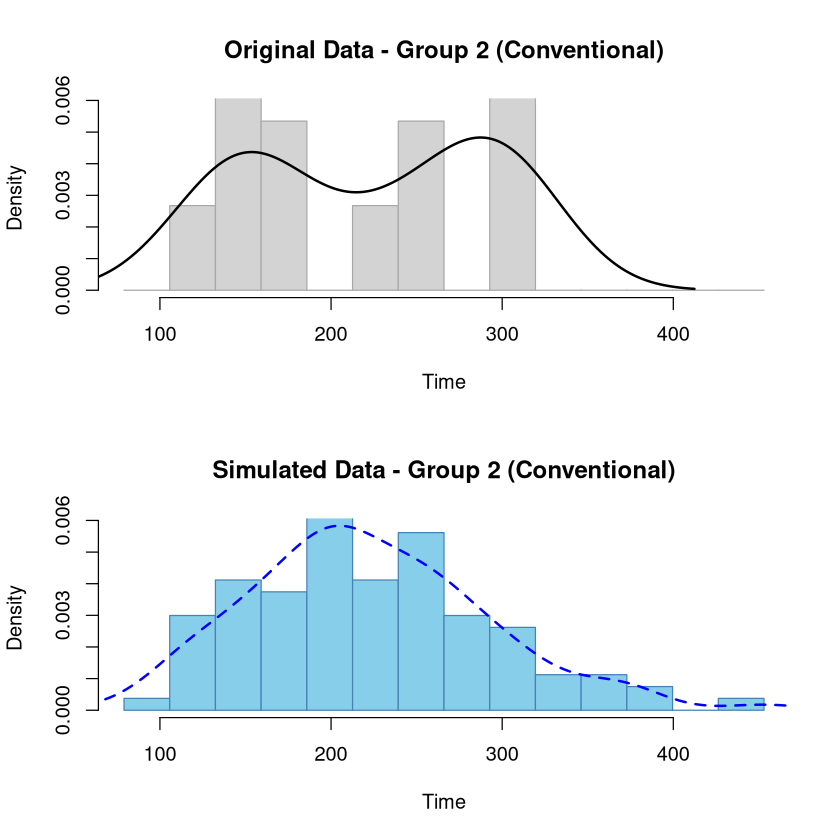

In [17]:
# Funkce pro generování a porovnání simulovaných dat
compare_histograms_improved <- function(data, simulated_data, group, distribution_type) {
  
  # Definice společných intervalů (breaks) pro oba histogramy
  breaks_common <- seq(
    floor(min(c(data, simulated_data))),
    ceiling(max(c(data, simulated_data))),
    length.out = 15
  )
  
# Nastavení okrajů a rozložení pro grafy pod sebou
layout(matrix(c(1, 2), nrow = 2, ncol = 1, byrow = TRUE))  # Grafy pod sebou

# Histogram původních dat
hist(
  data,
  breaks = breaks_common,
  freq = FALSE,
  main = paste("Original Data -", group),
  xlab = "Time",
  ylab = "Density",
  col = "lightgray",
  border = "darkgray",
  ylim = c(0, max(density(data)$y, density(simulated_data)$y))
)
lines(density(data), col = "black", lwd = 2)  # Hustota původních dat

# Histogram simulovaných dat
hist(
  simulated_data,
  breaks = breaks_common,
  freq = FALSE,
  main = paste("Simulated Data -", group),
  xlab = "Time",
  ylab = "Density",
  col = if (distribution_type == "Exponenciální") "lightgreen" else "skyblue",
  border = if (distribution_type == "Exponenciální") "darkgreen" else "steelblue",
  ylim = c(0, max(density(data)$y, density(simulated_data)$y))
)
lines(density(simulated_data), col = if (distribution_type == "Exponenciální") "green" else "blue", lwd = 2, lty = 2)  # Hustota simulovaných dat

# Resetování rozložení
layout(1)

  
# Číselné shrnutí
cat("\n")
cat(bold(paste0("Číselné shrnutí pro ", group, ":")), "\n")
cat("\n")
        
cat(bold("Původní data:\n"))
 cat("- Minimum:", round(min(data), 2), "\n")
  cat("- První kvartil:", round(quantile(data, 0.25), 2), "\n")
  cat("- Medián:", round(median(data), 2), "\n")
  cat("- Průměr:", round(mean(data), 2), "\n") 
  cat("- Třetí kvartil:", round(quantile(data, 0.75), 2), "\n")
  cat("- Maximum:", round(max(data), 2), "\n")
  cat("- Směrodatná odchylka:", round(sd(data), 2), "\n")
  cat("\n")
        
cat(bold("Simulovaná data:\n"))
  cat("- Minimum:", round(min(simulated_data), 2), "\n")
  cat("- První kvartil:", round(quantile(simulated_data, 0.25), 2), "\n")
  cat("- Medián:", round(median(simulated_data), 2), "\n")
  cat("- Průměr:", round(mean(simulated_data), 2), "\n")
  cat("- Třetí kvartil:", round(quantile(simulated_data, 0.75), 2), "\n")
  cat("- Maximum:", round(max(simulated_data), 2), "\n")
  cat("- Směrodatná odchylka:", round(sd(simulated_data), 2), "\n")
  cat("\n")
}


# Generování simulovaných dat a porovnání pro Group 1 (Modified) - Exponenciální rozdělení
lambda1 <- 1 / mean(group1$Time)
simulated_group1 <- rexp(100, rate = lambda1)
compare_histograms_improved(group1$Time, simulated_group1, "Group 1 (Modified)", "Exponenciální")

# Generování simulovaných dat a porovnání pro Group 2 (Conventional) - Normální rozdělení
mean2 <- mean(group2$Time)
sd2 <- sd(group2$Time)
simulated_group2 <- rnorm(100, mean = mean2, sd = sd2)
compare_histograms_improved(group2$Time, simulated_group2, "Group 2 (Conventional)", "Normální")

# Diskuze
cat(bold("Diskuze:"))
cat("\nPro Group 1 (Modified) byla použita exponenciální simulace. Histogram simulovaných dat ukazuje podobnou asymetrii a tvar jako původní data, přičemž simulovaná data mají o něco ostřejší rozložení.\n")
cat("Číselné shrnutí potvrzuje, že průměr a medián jsou blízké, ale směrodatná odchylka může být mírně odlišná.\n\n")

cat("Pro Group 2 (Conventional) byla použita normální simulace. Histogram simulovaných dat se dobře shoduje s původními daty, zejména ve tvaru kolem průměru.\n")
cat("Číselné shrnutí ukazuje, že průměr a medián simulovaných dat jsou velmi podobné původním datům, což potvrzuje vhodnost normálního rozdělení pro tuto skupinu.\n")


In [18]:
cat("\n")
# Funkce pro výpočet a výpis 95% konfidenčního intervalu pro střední hodnotu
calculate_confidence_interval <- function(data, group_name) {
# Použití t.test pro získání konfidenčního intervalu
  test <- t.test(data, conf.level = 0.95)
  
# Výpis výsledků    
  cat(bold("Skupina:", group_name))
  cat("\n")
  cat("95% konfidenční interval pro střední hodnotu:", 
      round(test$conf.int[1], 2), "-", round(test$conf.int[2], 2), "\n\n")
}

# Výpočet konfidenčního intervalu pro Group 1 (Modified)
calculate_confidence_interval(group1$Time, "Group 1 (Modified)")

# Výpočet konfidenčního intervalu pro Group 2 (Conventional)
calculate_confidence_interval(group2$Time, "Group 2 (Conventional)")


Skupina: Group 1 (Modified)
95% konfidenční interval pro střední hodnotu: 92.61 - 157.96 

Skupina: Group 2 (Conventional)
95% konfidenční interval pro střední hodnotu: 183.41 - 264.88 




Porovnání skupin (Modified vs. Conventional):
- Hypotéza H0: Střední hodnoty obou skupin jsou shodné.
- Hypotéza Ha: Střední hodnoty obou skupin se liší.
- Testová statistika (t): -4.09 
- P-hodnota: 4e-04 

Rozhodnutí o zamítnutí H0
Zamítáme H0 na hladině významnosti 5 %. Střední hodnoty skupin se liší.

Interpretace:
Na hladině významnosti 5 % existují dostatečné důkazy pro tvrzení, že se průměrné hodnoty času mezi skupinami 'Modified' a 'Conventional' liší.



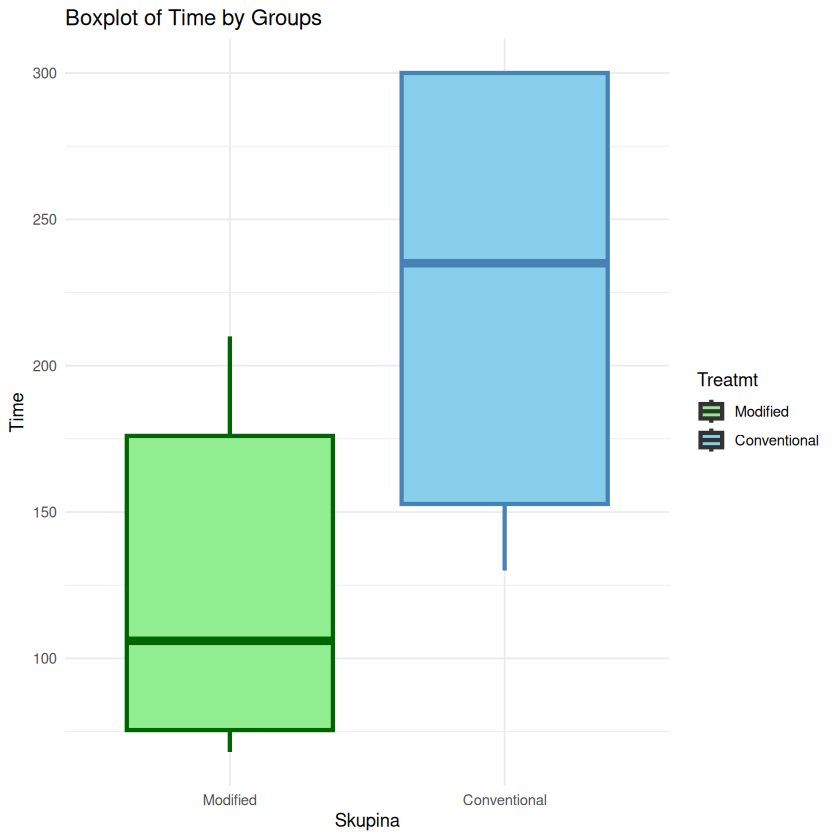

In [19]:
cat("\n")
# Rozdělení dat na skupiny
group1 <- subset(case0402, Treatmt == "Modified")
group2 <- subset(case0402, Treatmt == "Conventional")

# Definice hodnoty K
K <- 19 # den mých narozenin

# Funkce pro provedení dvouvýběrového t-testu a výpis výsledků
perform_group_comparison <- function(data1, data2) {
  # Provedení dvouvýběrového t-testu
  test <- t.test(data1, data2, alternative = "two.sided", var.equal = TRUE)
  
  # Výpis výsledků
  cat(bold("Porovnání skupin (Modified vs. Conventional):"))
  cat("\n")
  cat("- Hypotéza H0: Střední hodnoty obou skupin jsou shodné.\n")
  cat("- Hypotéza Ha: Střední hodnoty obou skupin se liší.\n")
  cat("- Testová statistika (t):", round(test$statistic, 3), "\n")
  cat("- P-hodnota:", round(test$p.value, 4), "\n")
  cat("\n")

  # Rozhodnutí o zamítnutí H0:
  cat(bold("Rozhodnutí o zamítnutí H0")) 
  cat("\n")
  if (test$p.value < 0.05) {
    cat("Zamítáme H0 na hladině významnosti 5 %. Střední hodnoty skupin se liší.\n")
  } else {
    cat("Nezamítáme H0 na hladině významnosti 5 %. Střední hodnoty skupin se neliší.\n")
  }
  return(test)
}

# Vizualizace dat pomocí boxplotu s jednotnými barvami
ggplot(case0402, aes(x = Treatmt, y = Time, fill = Treatmt)) +
  geom_boxplot(color = c("darkgreen", "steelblue"), lwd = 1.2) +  # Okraje podle barev
  scale_fill_manual(values = c("Modified" = "lightgreen", "Conventional" = "skyblue")) + # Jednotné výplně
  labs(title = "Boxplot of Time by Groups",
       x = "Skupina",
       y = "Time") +
  theme_minimal()

# Provedení testu pro obě skupiny
t_test_result <- perform_group_comparison(group1$Time, group2$Time)

# Praktická interpretace výsledků
  cat("\n")

if (t_test_result$p.value < 0.05) {
  cat(bold("Interpretace:"))
  cat("\n")
  cat("Na hladině významnosti 5 % existují dostatečné důkazy pro tvrzení, že se průměrné hodnoty času mezi skupinami 'Modified' a 'Conventional' liší.\n")
} else {
  cat(bold("Interpretace:"))
  cat("\n")
  cat("Na hladině významnosti 5 % neexistují dostatečné důkazy pro tvrzení, že se průměrné hodnoty času mezi skupinami 'Modified' a 'Conventional' liší.\n")
}
cat("\n")

